In [1]:
import pandas as pd
df=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [2]:
def gen_freq(text):
    word_list=[]
    for tw_words in text.split():
        word_list.extend(tw_words)
        
    word_freq=pd.Series(word_list).value_counts()
    
    word_freq[:20]
    
    return word_freq
gen_freq(df.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
of                          4053
#Demonetization             3253
demonetization              3162
on                          2751
#demonetization             2474
PM                          2384
Modi                        2379
India                       2243
and                         2220
a                           2180
that                        2168
out                         1729
for                         1672
so                          1599
had                         1598
who                         1591
Narendra                    1564
by                          1488
rich                        1477
find                        1421
Dear                        1407
implement                   1399
actually                    1370
have                        1315
@evanspiegel                1306
          

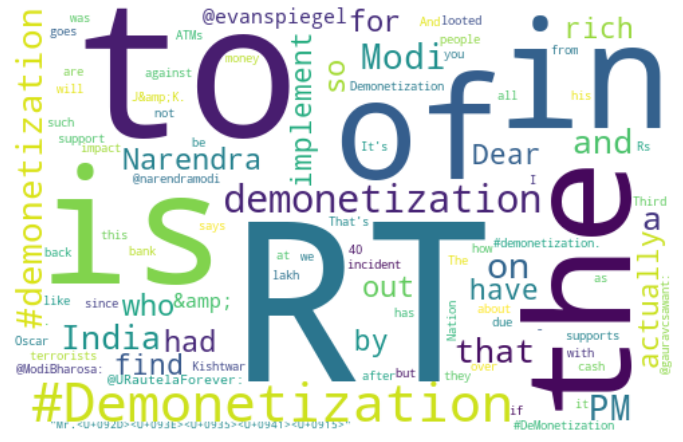

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq=gen_freq(df.text.str)

wc=WordCloud(width=500,height=320,max_words=100,background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','&',text)
    text=re.sub(r'[?!.;:,#@-]','',text)
    text=text.lower()
    return text

In [14]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'both', 'k', "shouldn't", "it's", 'was', 'you', 'have', 'do', "why's", 'such', 'from', "where's", 'so', 'by', 'which', 'your', 'few', 'also', "you're", "how's", 'because', "she'd", 'where', 'does', 'been', 'had', 'cannot', 'each', "she'll", 'again', 'in', 'or', 'her', 'i', "you've", 'during', 'she', 'me', 'then', 'like', 'its', 'theirs', 'at', 'more', 'between', "they'd", 'nor', "she's", 'http', 'until', 'otherwise', 'to', 'yourself', "we'll", "who's", 'while', 'am', "hasn't", "they've", 'once', 'up', "hadn't", "haven't", "didn't", 'out', "he'll", 'whom', 'themselves', 'that', 'however', 'would', 'very', 'over', "you'd", 'above', "i'm", 'our', 'doing', 'having', 'itself', 'who', 'should', 'why', 'any', "i'll", 'shall', 'the', 'being', "can't", 'most', "that's", 'him', 'if', 'yours', "i'd", "he's", 'herself', "they're", 'as', 'their', 'yourselves', 'www', 'further', 'is', 'ourselves', 'this', 'be', "we'd", 'ought', 'get', "what's", 'those', 'all', 'an', "don't", 'too', "won't", 'hers',

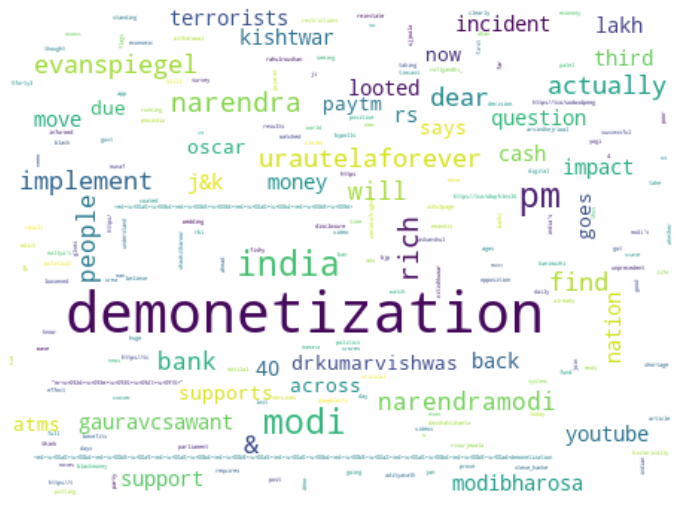

In [15]:
text = df.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()